<a href="https://colab.research.google.com/github/hari-kethan21/diabetes2/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("/content/diabetes.csv")
# Top 5 records:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Shape of dataset:
dataset.shape

(768, 9)

In [5]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Datatypes:
dataset.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
# Description:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Target feature:
print("Diabetes People     : ", dataset['Outcome'].value_counts()[1])
print("Non-Diabetes People : ", dataset['Outcome'].value_counts()[0])

Diabetes People     :  268
Non-Diabetes People :  500


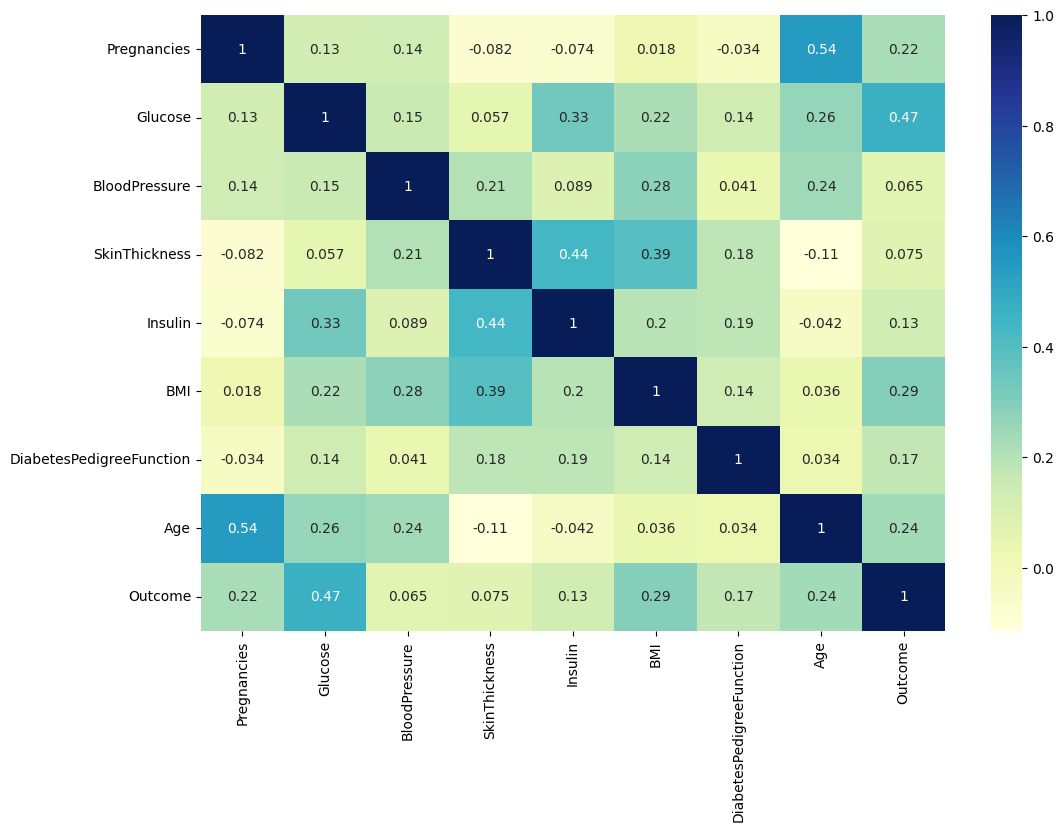

In [9]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [12]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [13]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [15]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7922077922077922
[[94 13]
 [19 28]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [17]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize SVM model with some hyperparameters
SVM_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust 'kernel', 'C', and 'gamma' based on your data

# Fit the model to the training data
SVM_model.fit(X_train, y_train)

# Predictions
y_pred = SVM_model.predict(X_test)

# Performance Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7922077922077922
Confusion Matrix:
 [[98  9]
 [23 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [18]:
import numpy as np

# Simulated RandomForest model for demonstration purposes
class RandomForest:
    @staticmethod
    def predict(input_data):
        # Example logic for prediction
        # For this example, we'll classify high glucose (>125) as high risk
        return 1 if input_data[0][1] > 125 else 0

def get_recommendations(input_data):
    # Ensure input_data is reshaped to 2D (as RandomForest.predict requires it)
    input_data_reshaped = np.array(input_data).reshape(1, -1)

    # Make the prediction
    prediction = RandomForest.predict(input_data_reshaped)

    # Interpret the risk prediction
    if prediction == 1:
        risk = "High risk of developing diabetes"
    else:
        risk = "Low risk of developing diabetes"

    # Unpacking input data (features)
    pregnancies, glucose, bp, skin_thickness, insulin, bmi, pedigree, age = input_data

    # List of recommendations
    recommendations = []

    if glucose > 125:
        recommendations.append("Monitor glucose levels and reduce sugar intake.")
    if bp > 120:
        recommendations.append("Maintain healthy blood pressure through exercise.")
    if bmi > 25:
        recommendations.append("Focus on weight management and a balanced diet.")
    if insulin > 200:
        recommendations.append("Consult a doctor for insulin resistance.")
    if age > 45:
        recommendations.append("Schedule regular checkups for blood sugar monitoring.")

    # Default healthy lifestyle advice for low-risk individuals
    if not recommendations and prediction == 0:
        recommendations.append("Continue maintaining a healthy lifestyle.")

    # Returning the risk and recommendations
    return risk, recommendations

# Taking input from the user
print("Please provide the following details:")

try:
    pregnancies = int(input("Number of pregnancies: "))
    glucose = float(input("Glucose level: "))
    bp = float(input("Blood pressure: "))
    skin_thickness = float(input("Skin thickness: "))
    insulin = float(input("Insulin level: "))
    bmi = float(input("Body Mass Index (BMI): "))
    pedigree = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))
except ValueError:
    print("Invalid input. Please enter numeric values.")
    exit()

# Collecting the inputs into a list
input_data = [pregnancies, glucose, bp, skin_thickness, insulin, bmi, pedigree, age]

# Getting the risk and recommendations
risk, recommendations = get_recommendations(input_data)

# Displaying the results
print(f"\nRisk: {risk}")
print("Recommendations:")
for rec in recommendations:
    print(f"- {rec}")


Please provide the following details:
Number of pregnancies: 6
Glucose level: 148
Blood pressure: 72
Skin thickness: 35
Insulin level: 0
Body Mass Index (BMI): 33.6
Diabetes Pedigree Function: 0.627
Age: 50

Risk: High risk of developing diabetes
Recommendations:
- Monitor glucose levels and reduce sugar intake.
- Focus on weight management and a balanced diet.
- Schedule regular checkups for blood sugar monitoring.
